In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("../")

%matplotlib notebook
import matplotlib.pylab as plt
# pylab.rcParams['figure.figsize'] = (10, 5)

In [2]:
from ld_gan import visualize
import numpy as np
import ld_gan
from ld_gan.visualize import gpu 
import ld_gan.utils.utils as ld

In [54]:
gpu()

name                           host             epoch                     gpu
------------------------------------------------------------------------------
xS_111v1.py                    hgsgpu02         1.96     (3.48 h/epc)      5  
xf_111v1_gclf_scs_new.py       hcigpu04         336.71   (47.8 s/epc)      3  
xf_111v1_nnscs.py              compvisgpu03     0.43     (49.5 s/epc)      0  
xs_111v1_512.py                compvisgpu02     35.85     
xs_111v1_gclf_scs_new.py       compvisgpu03     31.61    (5.81 m/epc)      2  
xs_111v1_new.py                compvisgpu04     57.26    (29.1 m/epc)      1  
------------------------------------------------------------------------------


5 projects running


In [ ]:
"data/faceScrub/crop_train/"

<IPython.core.display.Javascript object>


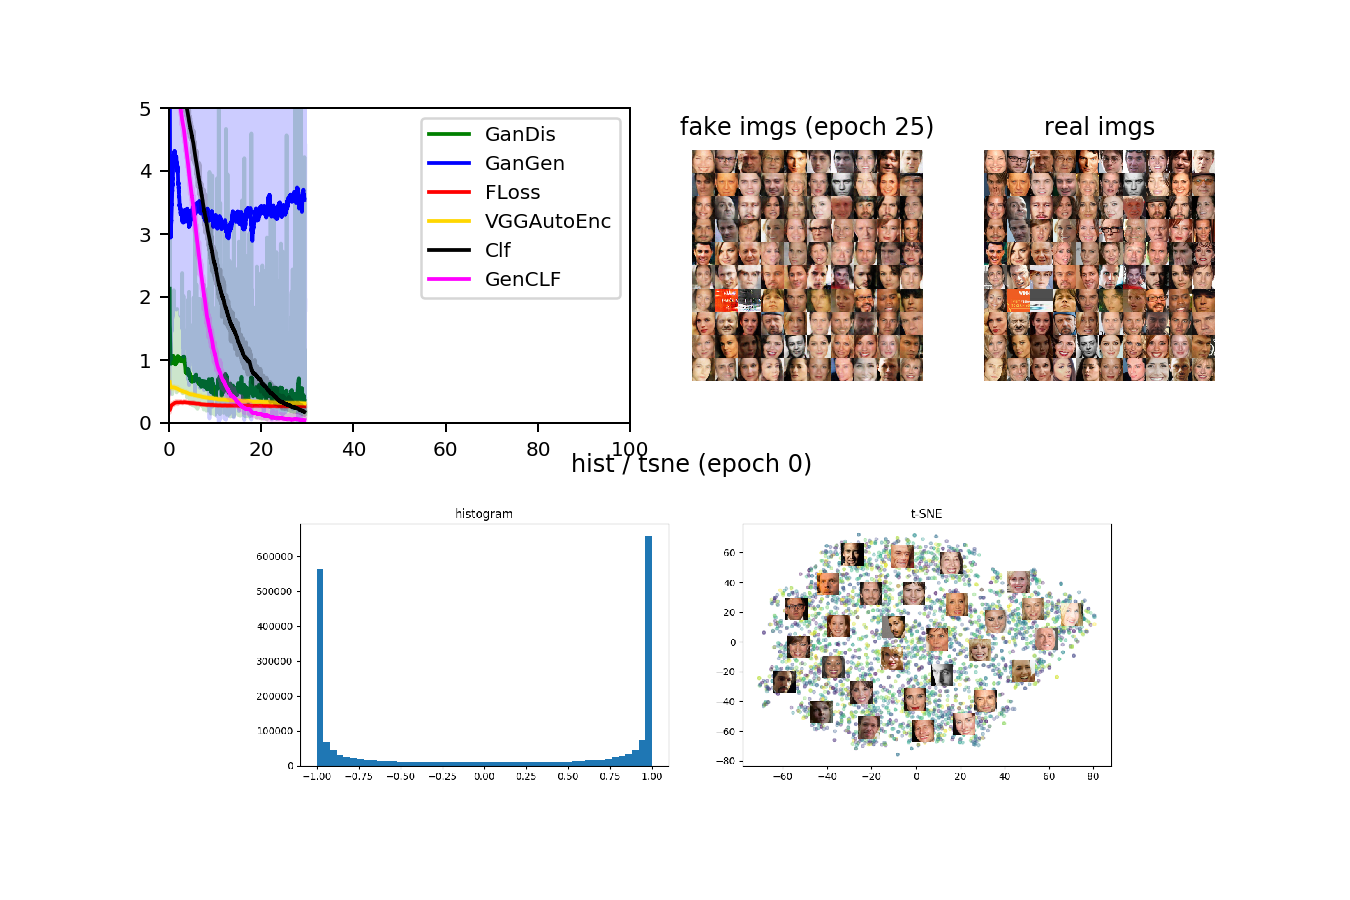

In [52]:
visualize.learning_curve_ia(
                            "xs_111v1_gclf_scs_new.py", 
                            high_res=True,
                            show_hist_tsne=True,
                            ymax=5, xmax=100,
                            mean=True,
                            #logs_fname = "dis_score.txt"
                            #logs_fname = "clf_acc.txt"
                            )

<IPython.core.display.Javascript object>


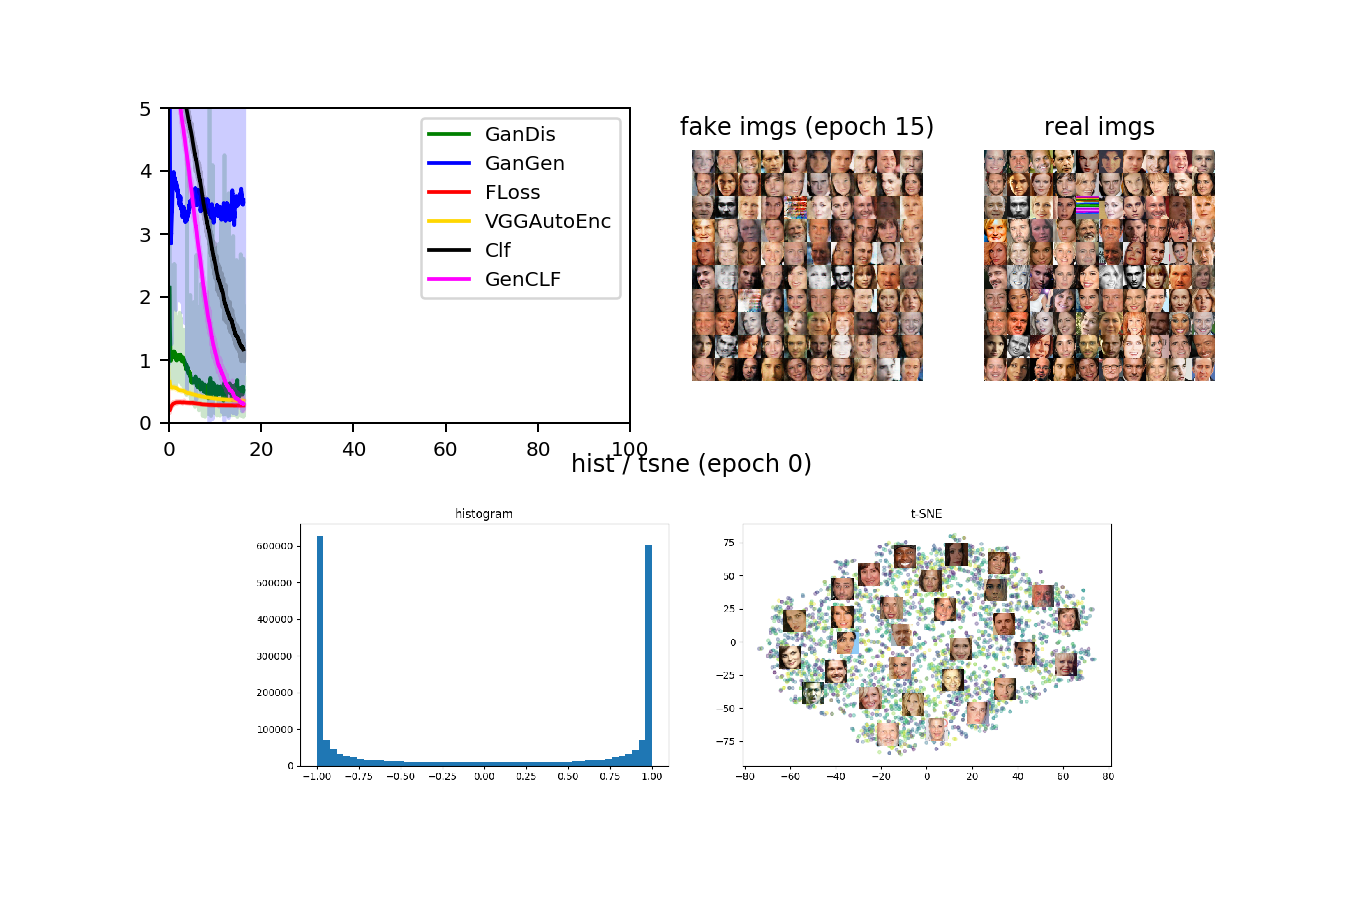

In [53]:
visualize.learning_curve_ia(
                            "xs_111v1_gclf_scs.py", 
                            high_res=True,
                            show_hist_tsne=True,
                            ymax=5, xmax=100,
                            mean=True,
                            #logs_fname = "dis_score.txt"
                            #logs_fname = "clf_acc.txt"
                            )

<IPython.core.display.Javascript object>


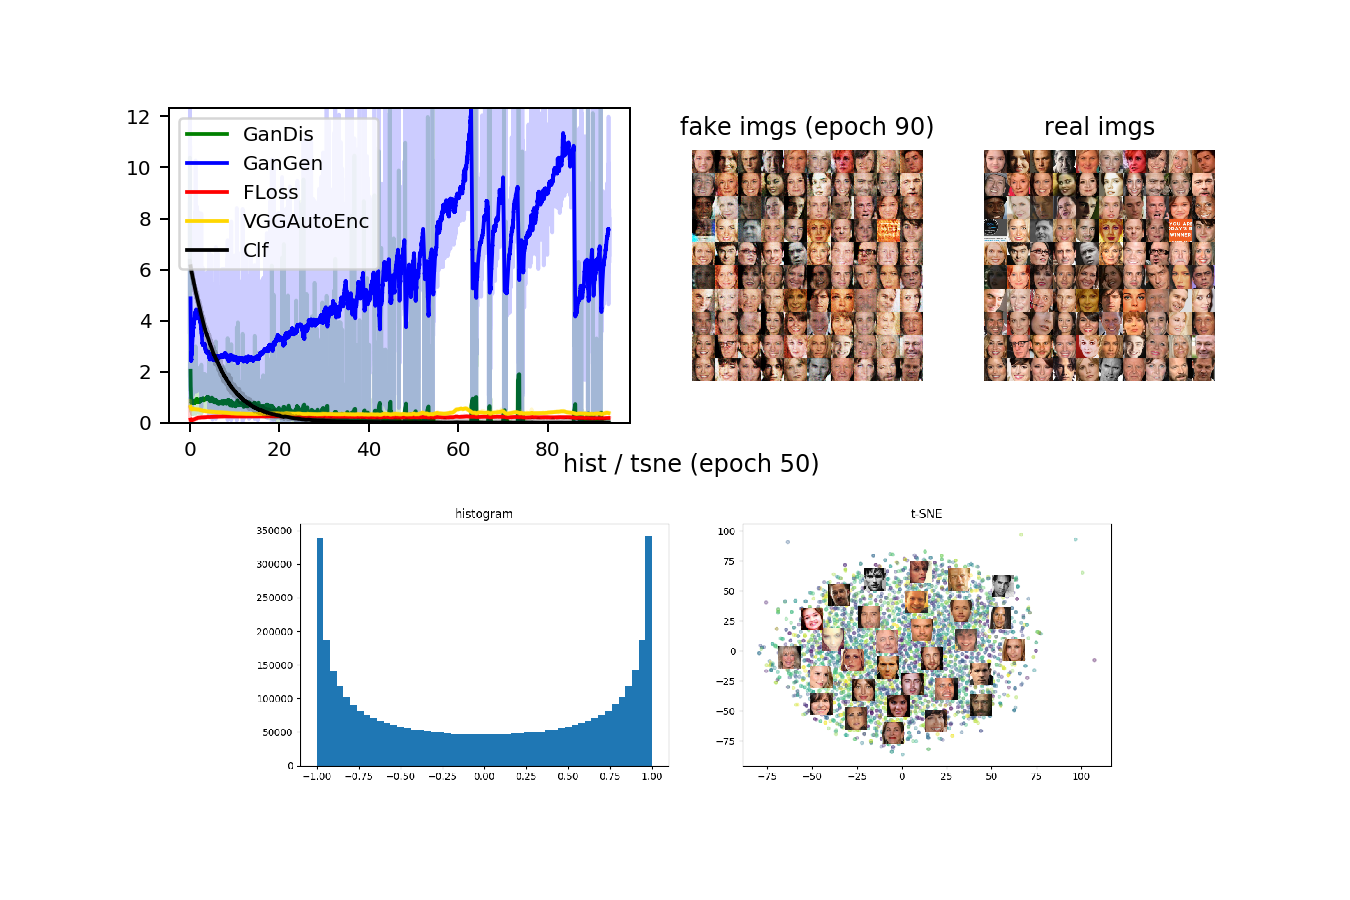

In [14]:
visualize.learning_curve_ia(
                            "xs_111v1.py", 
                            high_res=True,
                            show_hist_tsne=True,
                            #ymax=5, xmax=500,
                            mean=True,
                            #logs_fname = "dis_score.txt"
                            #logs_fname = "clf_acc.txt"
                            )